In [1]:
import pandas as pd
import numpy as np

**1. Data Cleaning & Preparation**

In [3]:
# Reload the dataset
df = pd.read_csv("Train.csv")

In [6]:
df.head

<bound method NDFrame.head of                  date_time is_holiday  air_pollution_index  humidity  \
0      2012-10-02 09:00:00        NaN                  121        89   
1      2012-10-02 10:00:00        NaN                  178        67   
2      2012-10-02 11:00:00        NaN                  113        66   
3      2012-10-02 12:00:00        NaN                   20        66   
4      2012-10-02 13:00:00        NaN                  281        65   
...                    ...        ...                  ...       ...   
33745  2017-05-17 21:00:00        NaN                   74        85   
33746  2017-05-17 22:00:00        NaN                   81        70   
33747  2017-05-17 22:00:00        NaN                  138        70   
33748  2017-05-17 23:00:00        NaN                  229        66   
33749  2017-05-17 23:00:00        NaN                  140        63   

       wind_speed  wind_direction  visibility_in_miles  dew_point  \
0               2             329   

In [8]:
df.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [10]:
# Convert date_time to datetime object
#str -> data and time formate
df["date_time"] = pd.to_datetime(df["date_time"])

In [12]:
df.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [14]:
# Extract hour, day of week, and month
df["hour"] = df["date_time"].dt.hour
df["day_of_week"] = df["date_time"].dt.dayofweek  # Monday=0, Sunday=6
df["month"] = df["date_time"].dt.month

In [16]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,hour,day_of_week,month
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,9,1,10
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,1,10
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11,1,10
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12,1,10
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13,1,10


In [18]:
# Set is_holiday to 'Holiday' if it's a Sunday and currently marked as None
df["is_holiday"] = df["is_holiday"].replace("None", np.nan)
df["is_holiday"] = df.apply(
    lambda row: "Holiday" if (pd.isna(row["is_holiday"]) and row["day_of_week"] == 6) else row["is_holiday"],
    axis=1
)

In [20]:
df['is_holiday'].value_counts()

is_holiday
Holiday                      4841
Thanksgiving Day                5
Christmas Day                   5
New Years Day                   5
Columbus Day                    4
Veterans Day                    4
Washingtons Birthday            4
Labor Day                       4
Memorial Day                    3
Independence Day                3
State Fair                      3
Martin Luther King Jr Day       3
Name: count, dtype: int64

**🤣I am unsure why American holidays appear in the Indian Metro system.🤣**

**India is poised to become the world's largest data producer** due to its large population. However, **we still do not have access to many datasets sourced specifically from India**. I believe this could be **due to a lack of awareness**, **resulting in people neglecting data collection and management.**

It would be useful to assess whether data in **India is being optimally utilized**. I think India can channel its resources more effectively to improve data generation and usage.

In [23]:
#check is it change
(df['day_of_week'] == 6) & (df['is_holiday'] == 'Holiday')

0        False
1        False
2        False
3        False
4        False
         ...  
33745    False
33746    False
33747    False
33748    False
33749    False
Length: 33750, dtype: bool

In [25]:
# Encode is_holiday to binary: 1 if holiday, 0 otherwise
# List of recognized holidays
holiday_names = [
    "Holiday",
    "Thanksgiving Day",
    "Christmas Day",
    "New Years Day",
    "Columbus Day",
    "Veterans Day",
    "Washingtons Birthday",
    "Labor Day",
    "Memorial Day",
    "Independence Day",
    "State Fair",
    "Martin Luther King Jr Day"
]

# Encode is_holiday column: 1 if it's one of the listed holidays, else 0
df["is_holiday_encoded"] = df["is_holiday"].isin(holiday_names).astype(int)

In [27]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,hour,day_of_week,month,is_holiday_encoded
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,9,1,10,0
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,1,10,0
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11,1,10,0
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12,1,10,0
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13,1,10,0


In [29]:
# One-hot encode weather_type and weather_description
df = pd.get_dummies(df, columns=["weather_type", "weather_description"], drop_first=True)

In [31]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,...,False,False,False,False,False,False,False,False,False,False


**✅ Recommended Encoding Strategy:**

**1. For Linear Regression & SVM:**
Use one-hot encoding for categorical columns like weather_type, weather_description, etc.

Reason: These models assume numeric relationships between features. Label encoding may mislead them.

**2. For Tree-based models (Random Forest, XGBoost):**
You can use either:

**One-hot encoding (slower, more memory)**

Or **label encoding (faster, but you must avoid implying order)**

To keep things consistent across all models, it's safe and often best practice to use one-hot encoding.

In [34]:
# Return cleaned and preprocessed dataframe structure
df_cleaned_head = df.head()
df_cleaned_columns = df.columns.tolist()

df_cleaned_head, df_cleaned_columns

(            date_time is_holiday  air_pollution_index  humidity  wind_speed  \
 0 2012-10-02 09:00:00        NaN                  121        89           2   
 1 2012-10-02 10:00:00        NaN                  178        67           3   
 2 2012-10-02 11:00:00        NaN                  113        66           3   
 3 2012-10-02 12:00:00        NaN                   20        66           3   
 4 2012-10-02 13:00:00        NaN                  281        65           3   
 
    wind_direction  visibility_in_miles  dew_point  temperature  rain_p_h  ...  \
 0             329                    1          1       288.28       0.0  ...   
 1             330                    1          1       289.36       0.0  ...   
 2             329                    2          2       289.58       0.0  ...   
 3             329                    5          5       290.13       0.0  ...   
 4             329                    7          7       291.14       0.0  ...   
 
    weather_description_

**Step 2: Exploratory Data Analysis (EDA)**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Convert hour to integer in case it's float
df['hour'] = df['hour'].astype(int)

In [42]:
# Set Seaborn style
sns.set(style="whitegrid")

**🔹 A. Time-Based Insights**

**1.Peak metro traffic hours**

**Insight:** Traffic peaks during morning starting [6 AM end 8 AM] volume traffic and evening starting [3 PM end 5PM], reflecting morning and evening commute times.

**Use Case:**
#Increase more frequency of metro during this time.

#Useful for staffing schedules, energy management, and ad campaign targeting.

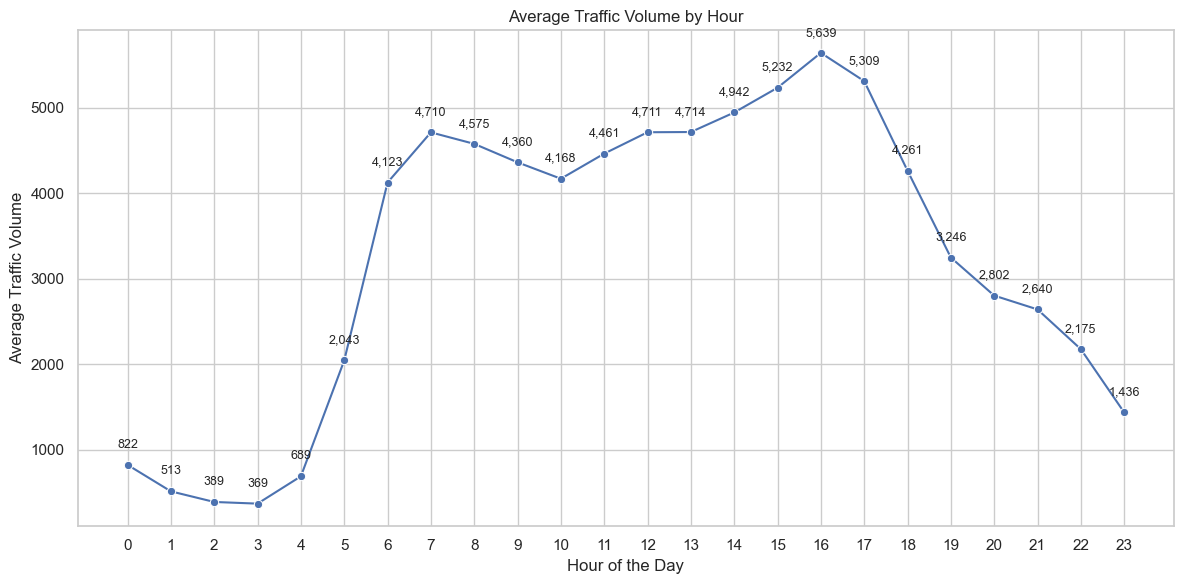

In [46]:
plt.figure(figsize=(12, 6))
hourly_traffic = df.groupby('hour')['traffic_volume'].mean()
for x, y in zip(hourly_traffic.index, hourly_traffic.values):
    plt.text(x, y + 200, f"{int(y):,}", ha='center', fontsize=9)
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker='o')
plt.title("Average Traffic Volume by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Traffic Volume")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

**2.Traffic variation across days of the week**

**Insight:** Weekdays (especially Wednesday TO Friday) have higher traffic than weekends.

**Use Case:** Optimize maintenance schedules or marketing campaigns on low-volume days.

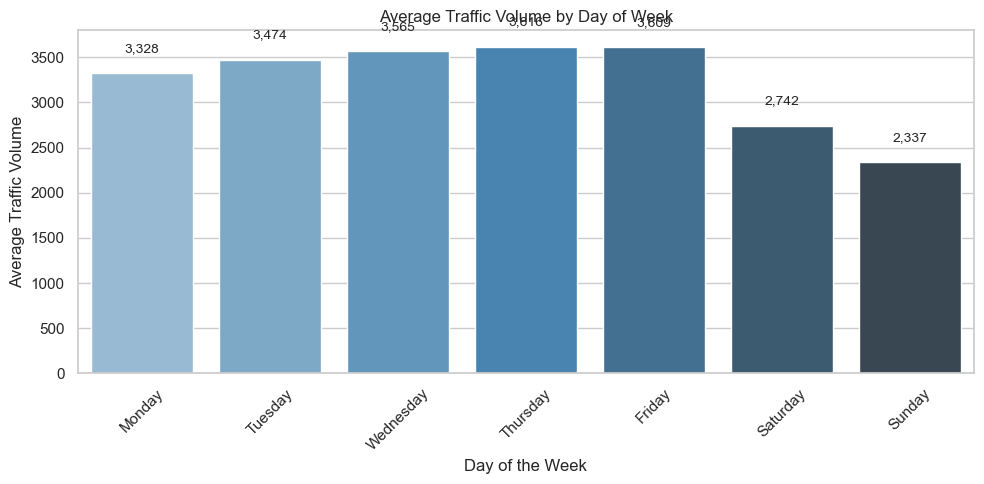

In [49]:
#You're getting this warning because Seaborn now expects a hue if you use a palette.

# Ensure day names exist
day_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['day_name'] = df['day_of_week'].map(day_map)

# Group by day_name (not numeric) and reindex to desired order
dow_traffic = df.groupby('day_name')['traffic_volume'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot
plt.figure(figsize=(10, 5))
for i, val in enumerate(dow_traffic.values):
    plt.text(i, val + 200, f"{int(val):,}", ha='center', va='bottom', fontsize=10)
sns.barplot(
    x=dow_traffic.index,
    y=dow_traffic.values,
    hue=dow_traffic.index,  # for consistent coloring
    palette="Blues_d",
    dodge=False,
    legend=False
)
plt.title("Average Traffic Volume by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Traffic Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
df.drop('day_name',axis=1,inplace=True)

**3.Weekend vs weekday patterns**

**Insight:** Traffic on weekends is lower, but variability is higher.

**Use Case:** Dynamic ticket pricing and special weekend offers.

In [54]:
df.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'traffic_volume',
       'hour', 'day_of_week', 'month', 'is_holiday_encoded',
       'weather_type_Clouds', 'weather_type_Drizzle', 'weather_type_Fog',
       'weather_type_Haze', 'weather_type_Mist', 'weather_type_Rain',
       'weather_type_Smoke', 'weather_type_Snow', 'weather_type_Squall',
       'weather_type_Thunderstorm', 'weather_description_Sky is Clear',
       'weather_description_broken clouds', 'weather_description_drizzle',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_freezing rain', 'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weath

In [56]:
df['is_holiday_encoded'].value_counts()

is_holiday_encoded
0    28866
1     4884
Name: count, dtype: int64

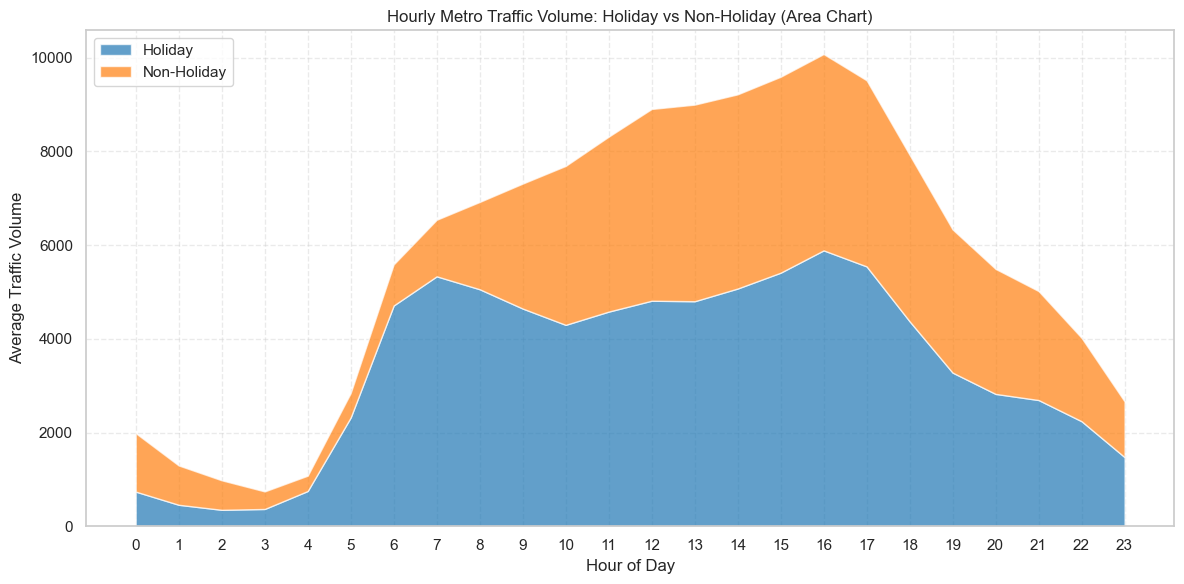

In [58]:
# Group by hour and is_holiday_encoded, compute mean traffic
hourly_avg = df.groupby(['hour', 'is_holiday_encoded'])['traffic_volume'].mean().reset_index()

# Map readable labels
hourly_avg['day_type'] = hourly_avg['is_holiday_encoded'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Pivot for area plot
pivot_data = hourly_avg.pivot(index='hour', columns='day_type', values='traffic_volume').fillna(0)

# Safe access for each area (in case some data is missing)
non_holiday = pivot_data['Non-Holiday'] if 'Non-Holiday' in pivot_data else [0]*24
holiday = pivot_data['Holiday'] if 'Holiday' in pivot_data else [0]*24

# Plot area chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    pivot_data.index,
    non_holiday,
    holiday,
    labels=['Holiday','Non-Holiday'],
    colors=['#1f77b4', '#ff7f0e'],
    alpha=0.7
)

plt.title('Hourly Metro Traffic Volume: Holiday vs Non-Holiday (Area Chart)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(0, 24))
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

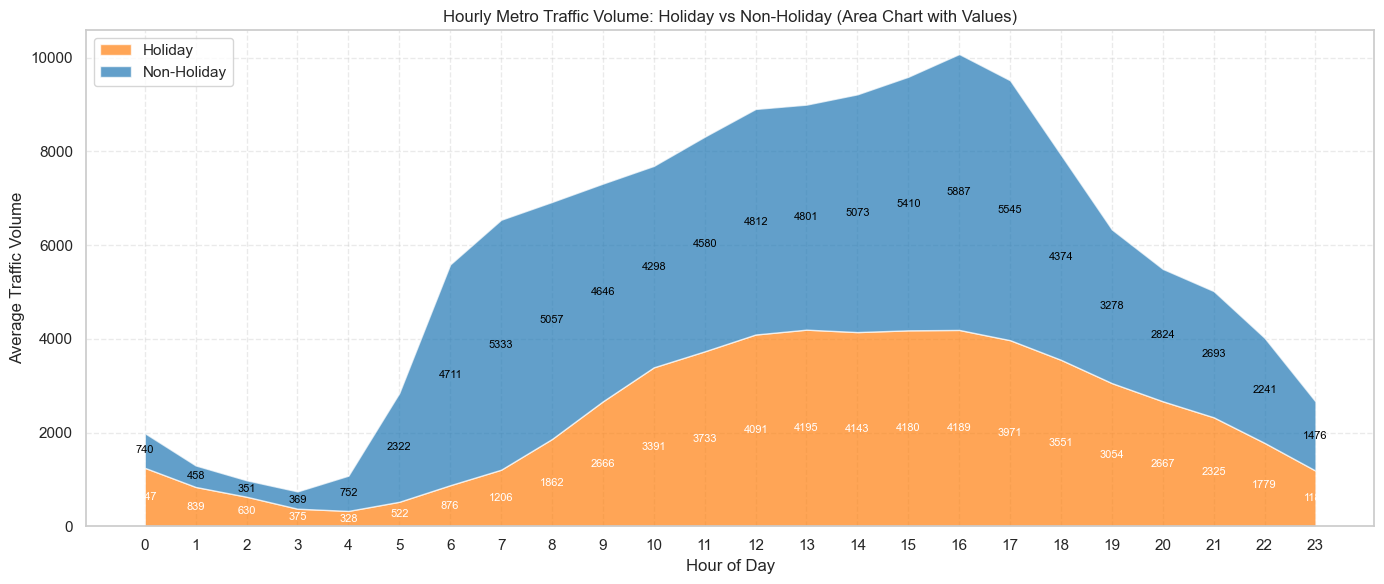

In [60]:
# Group by hour and is_holiday_encoded, compute mean traffic
hourly_avg = df.groupby(['hour', 'is_holiday_encoded'])['traffic_volume'].mean().reset_index()

# Map readable labels
hourly_avg['day_type'] = hourly_avg['is_holiday_encoded'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Pivot for area plot
pivot_data = hourly_avg.pivot(index='hour', columns='day_type', values='traffic_volume').fillna(0)

# Safe access
non_holiday = pivot_data['Non-Holiday'] if 'Non-Holiday' in pivot_data else [0]*24
holiday = pivot_data['Holiday'] if 'Holiday' in pivot_data else [0]*24

# Plot area chart
# Plot area chart
plt.figure(figsize=(14, 6))
plt.stackplot(
    pivot_data.index,
    holiday,        # Holiday is now plotted first (at bottom)
    non_holiday,    # Non-Holiday stacked on top
    labels=['Holiday', 'Non-Holiday'],  # Correct label order
    colors=['#ff7f0e', '#1f77b4'],
    alpha=0.7
)

# Add value labels (numbers)
for hour in pivot_data.index:
    h = holiday[hour]
    nh = non_holiday[hour]
    
    # Value for Holiday (bottom)
    plt.text(hour, h/2, f"{h:.0f}", ha='center', va='center', fontsize=8, color='white')
    
    # Value for Non-Holiday (stacked on top of Holiday)
    plt.text(hour, h + nh/2, f"{nh:.0f}", ha='center', va='center', fontsize=8, color='black')

# Final touches
plt.title('Hourly Metro Traffic Volume: Holiday vs Non-Holiday (Area Chart with Values)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(0, 24))
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**4.Monthly/seasonal trends**

**Insight:** March to May and October to December show higher traffic — possibly linked to weather.

**Use Case:** Prepare for infrastructure strain or schedule expansion during high-volume months.

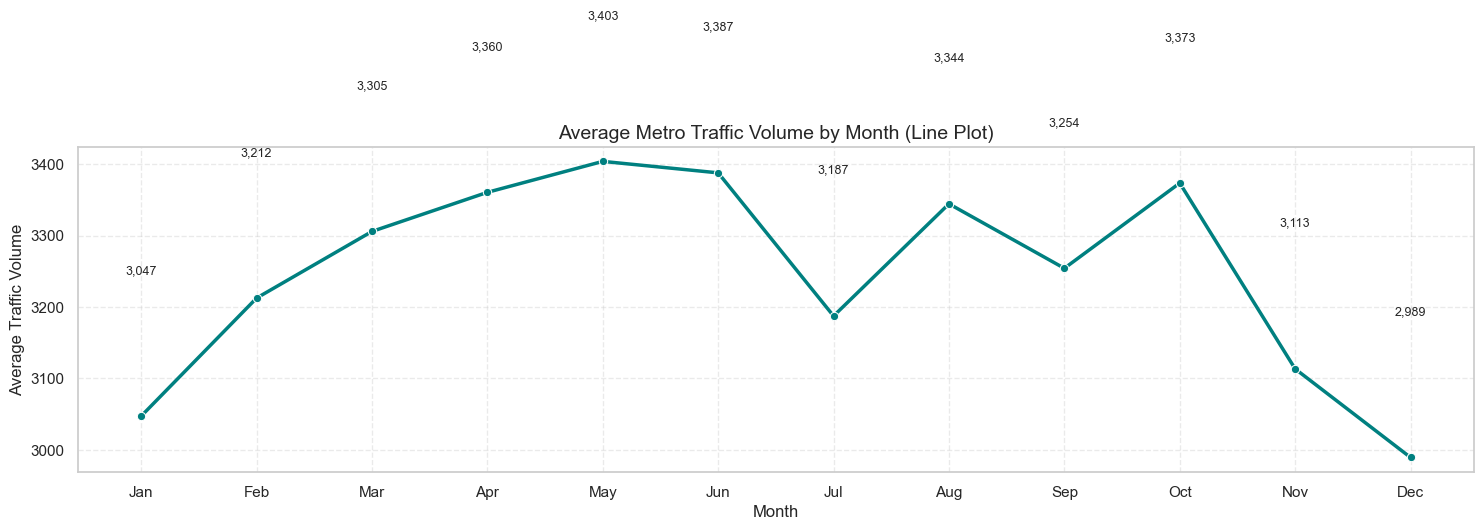

In [64]:
# Group and calculate average traffic volume by month
monthly_traffic = df.groupby('month')['traffic_volume'].mean().sort_index()

# Line plot
plt.figure(figsize=(15,6))
sns.lineplot(x=monthly_traffic.index, y=monthly_traffic.values, marker='o', linewidth=2.5, color='teal')

# Annotate values on the line
for x, y in zip(monthly_traffic.index, monthly_traffic.values):
    plt.text(x, y + 200, f"{int(y):,}", ha='center', fontsize=9)

# Customize axes and labels
plt.title("Average Metro Traffic Volume by Month (Line Plot)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Traffic Volume")
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**🔹 B. Weather-Based Analysis**

**-->Key Takeaways: Why March–May and October–December Show Higher Traffic**

**1.Comfortable Weather makes more people to travel:**

These months have **mild temperatures** (around 272–287K ≈ 0–15°C).

More favorable for **commuting and activities.**

**2.Lower Rainfall Compared to Summer:**

July sees extreme rainfall (~3.66 mm/h) → traffic dips.

**March–May and Oct–Dec have less rain** (0–0.17 mm/h), encouraging more travel.

**3.Good Visibility:**

Visibility remains stable across months, but is **slightly better in spring and fall.**

**4.Avoiding Extremes:**

People may **travel less in extreme summer heat (June–July)** or freezing winter.

Hence, **spring (Mar–May) and fall (Oct–Dec) become ideal.**


**More detail, you can get it in below⬇️**


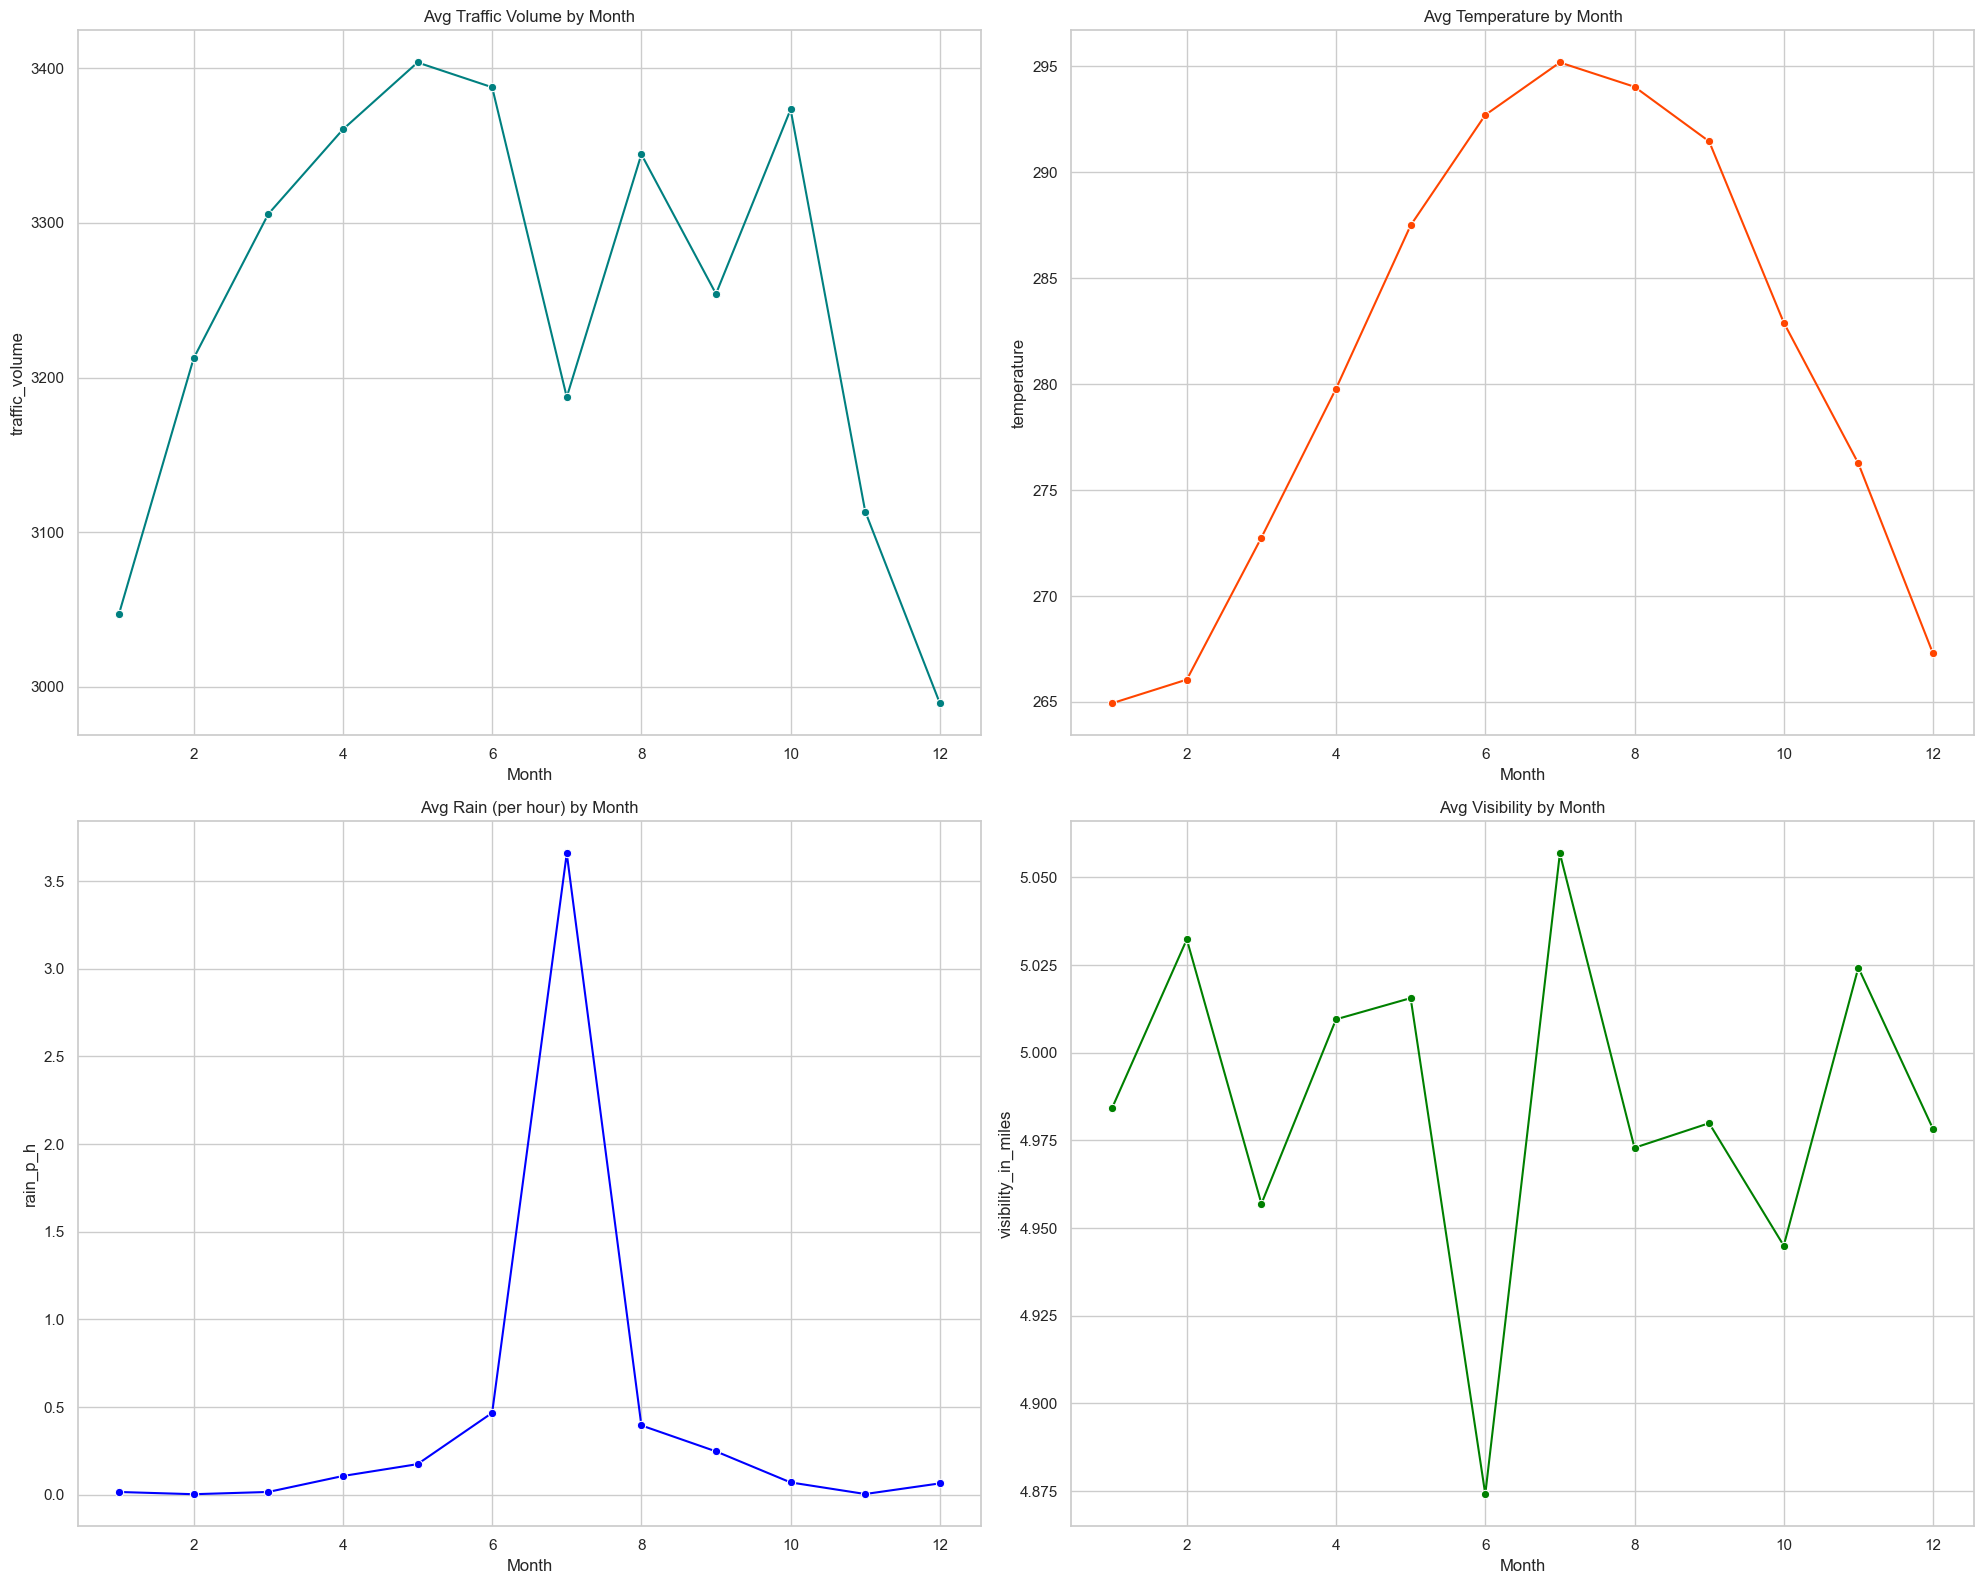

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("metro_traffic_data.csv")

# Extract month from datetime
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month

# Group by month and calculate mean for each feature
monthly_stats = df.groupby('month').agg({
    'traffic_volume': 'mean',
    'temperature': 'mean',
    'rain_p_h': 'mean',
    'visibility_in_miles': 'mean'
}).reset_index()

# Set up 2x2 grid plot
plt.figure(figsize=(20,16))

# Traffic Volume
plt.subplot(2, 2, 1)
sns.lineplot(data=monthly_stats, x='month', y='traffic_volume', marker='o', color='teal')
plt.title("Avg Traffic Volume by Month")
plt.xlabel("Month")
plt.ylabel("traffic_volume")

# Temperature
plt.subplot(2, 2, 2)
sns.lineplot(data=monthly_stats, x='month', y='temperature', marker='o', color='orangered')
plt.title("Avg Temperature by Month")
plt.xlabel("Month")
plt.ylabel("temperature")

# Rain
plt.subplot(2, 2, 3)
sns.lineplot(data=monthly_stats, x='month', y='rain_p_h', marker='o', color='blue')
plt.title("Avg Rain (per hour) by Month")
plt.xlabel("Month")
plt.ylabel("rain_p_h")

# Visibility
plt.subplot(2, 2, 4)
sns.lineplot(data=monthly_stats, x='month', y='visibility_in_miles', marker='o', color='green')
plt.title("Avg Visibility by Month")
plt.xlabel("Month")
plt.ylabel("visibility_in_miles")

# Layout adjustment
plt.tight_layout()
plt.show()


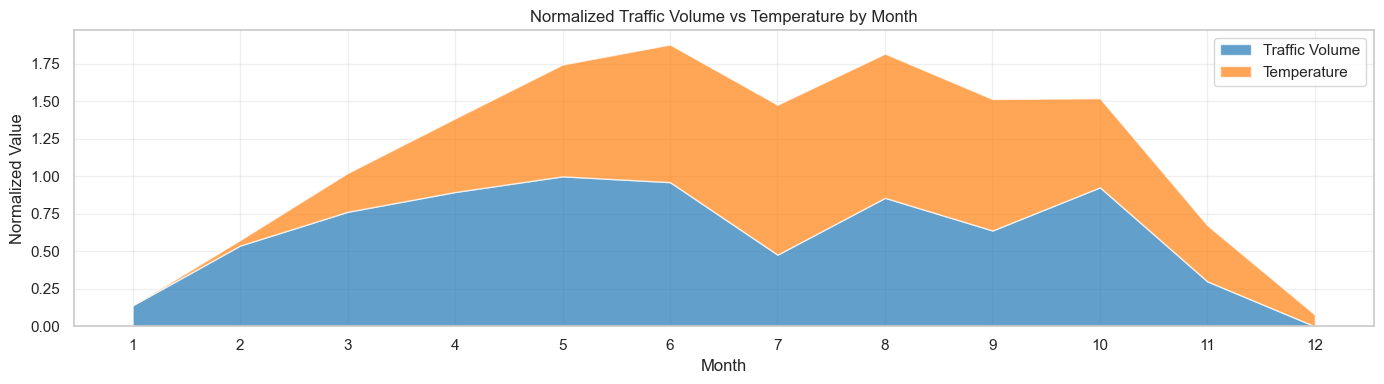

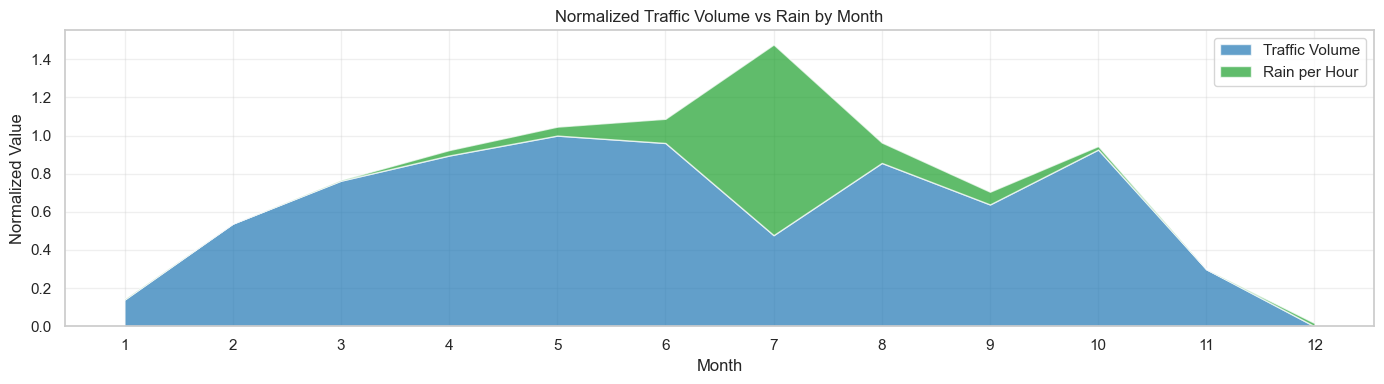

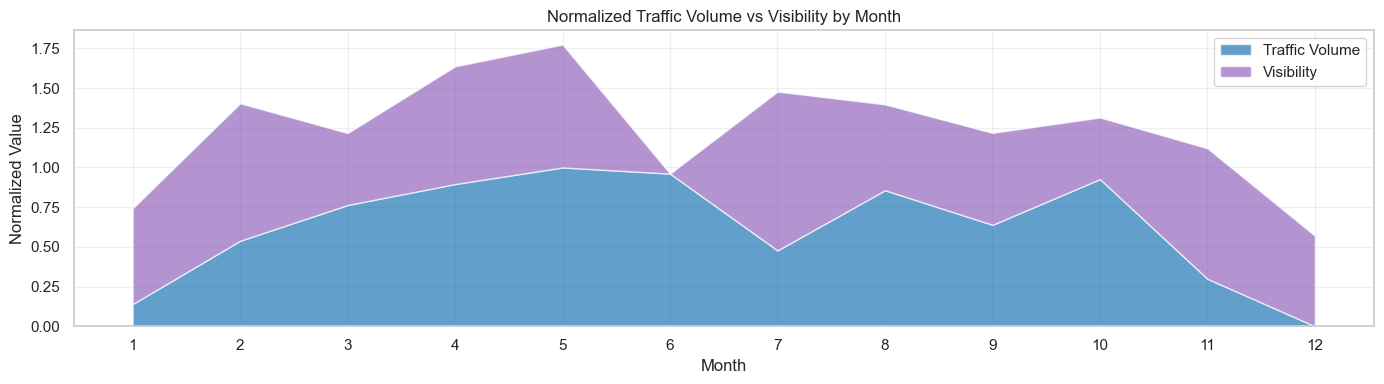

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("metro_traffic_data.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month

# Monthly averages
monthly_avg = df.groupby('month').agg({
    'traffic_volume': 'mean',
    'temperature': 'mean',
    'rain_p_h': 'mean',
    'visibility_in_miles': 'mean'
}).reset_index()

# Normalize values for area plotting
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

monthly_avg['traffic_norm'] = normalize(monthly_avg['traffic_volume'])
monthly_avg['temp_norm'] = normalize(monthly_avg['temperature'])
monthly_avg['rain_norm'] = normalize(monthly_avg['rain_p_h'])
monthly_avg['visib_norm'] = normalize(monthly_avg['visibility_in_miles'])

# 1. Area chart: Traffic Volume + Temperature
plt.figure(figsize=(14, 4))
plt.stackplot(monthly_avg['month'], 
              monthly_avg['traffic_norm'], 
              monthly_avg['temp_norm'], 
              labels=['Traffic Volume', 'Temperature'], 
              colors=['#1f77b4', '#ff7f0e'], alpha=0.7)
plt.title("Normalized Traffic Volume vs Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Normalized Value")
plt.xticks(range(1, 13))
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Area chart: Traffic Volume + Rain
plt.figure(figsize=(14, 4))
plt.stackplot(monthly_avg['month'], 
              monthly_avg['traffic_norm'], 
              monthly_avg['rain_norm'], 
              labels=['Traffic Volume', 'Rain per Hour'], 
              colors=['#1f77b4', '#1ca02c'], alpha=0.7)
plt.title("Normalized Traffic Volume vs Rain by Month")
plt.xlabel("Month")
plt.ylabel("Normalized Value")
plt.xticks(range(1, 13))
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Area chart: Traffic Volume + Visibility
plt.figure(figsize=(14, 4))
plt.stackplot(monthly_avg['month'], 
              monthly_avg['traffic_norm'], 
              monthly_avg['visib_norm'], 
              labels=['Traffic Volume', 'Visibility'], 
              colors=['#1f77b4', '#9467bd'], alpha=0.7)
plt.title("Normalized Traffic Volume vs Visibility by Month")
plt.xlabel("Month")
plt.ylabel("Normalized Value")
plt.xticks(range(1, 13))
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


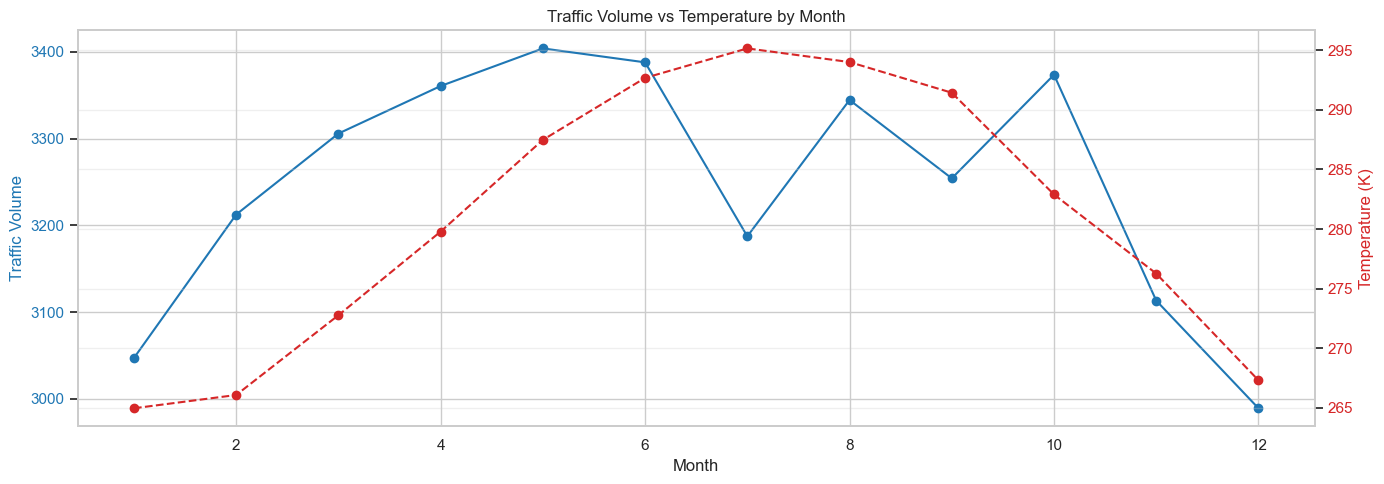

In [71]:
fig, ax1 = plt.subplots(figsize=(14, 5))

# Left Y-axis for traffic
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(monthly_avg['month'], monthly_avg['traffic_volume'], marker='o', color=color, label='Traffic Volume')
ax1.tick_params(axis='y', labelcolor=color)

# Right Y-axis for temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature (K)', color=color)
ax2.plot(monthly_avg['month'], monthly_avg['temperature'], marker='o', color=color, linestyle='--', label='Temperature')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Traffic Volume vs Temperature by Month')
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()


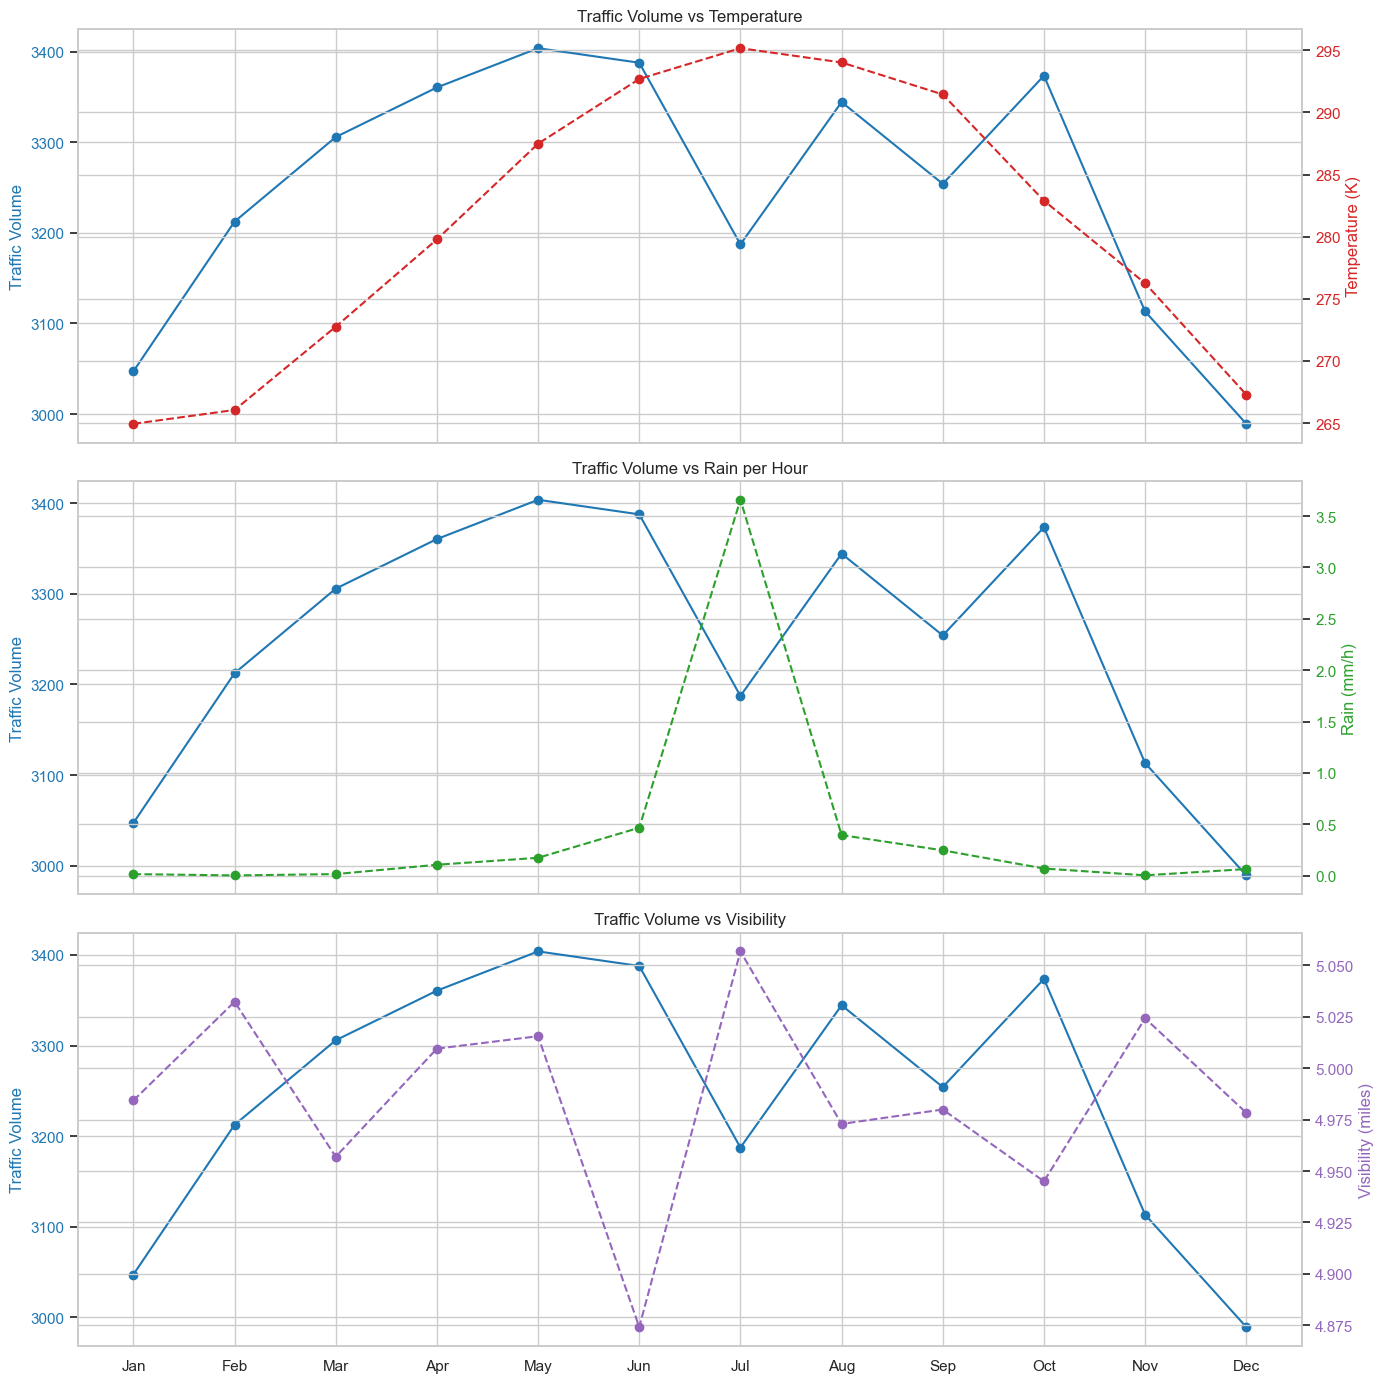

In [74]:
import matplotlib.pyplot as plt

# Assuming 'monthly_avg' DataFrame already contains columns:
# 'month', 'traffic_volume', 'temperature', 'rain_p_h', 'visibility_in_miles'

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

# 1. Traffic vs Temperature
ax1 = axes[0]
ax1.plot(monthly_avg['month'], monthly_avg['traffic_volume'], color='tab:blue', marker='o', label='Traffic Volume')
ax1.set_ylabel('Traffic Volume', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1b = ax1.twinx()
ax1b.plot(monthly_avg['month'], monthly_avg['temperature'], color='tab:red', linestyle='--', marker='o', label='Temperature')
ax1b.set_ylabel('Temperature (K)', color='tab:red')
ax1b.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title('Traffic Volume vs Temperature')

# 2. Traffic vs Rain
ax2 = axes[1]
ax2.plot(monthly_avg['month'], monthly_avg['traffic_volume'], color='tab:blue', marker='o', label='Traffic Volume')
ax2.set_ylabel('Traffic Volume', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2b = ax2.twinx()
ax2b.plot(monthly_avg['month'], monthly_avg['rain_p_h'], color='tab:green', linestyle='--', marker='o', label='Rain per Hour')
ax2b.set_ylabel('Rain (mm/h)', color='tab:green')
ax2b.tick_params(axis='y', labelcolor='tab:green')
ax2.set_title('Traffic Volume vs Rain per Hour')

# 3. Traffic vs Visibility
ax3 = axes[2]
ax3.plot(monthly_avg['month'], monthly_avg['traffic_volume'], color='tab:blue', marker='o', label='Traffic Volume')
ax3.set_ylabel('Traffic Volume', color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')
ax3b = ax3.twinx()
ax3b.plot(monthly_avg['month'], monthly_avg['visibility_in_miles'], color='tab:purple', linestyle='--', marker='o', label='Visibility')
ax3b.set_ylabel('Visibility (miles)', color='tab:purple')
ax3b.tick_params(axis='y', labelcolor='tab:purple')
ax3.set_title('Traffic Volume vs Visibility')

# Common x-axis label and formatting
plt.xticks(ticks=range(1, 13), labels=months)
plt.xlabel('Month')
plt.tight_layout()
plt.show()


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("metro_traffic_data.csv")

# Extract month from datetime
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month

# Group by month and calculate mean for each feature
monthly_stats = df.groupby('month').agg({
    'traffic_volume': 'mean',
    'temperature': 'mean',
    'rain_p_h': 'mean',
    'visibility_in_miles': 'mean'
}).reset_index()


# Normalize values for area plotting
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

monthly_avg['traffic_norm'] = normalize(monthly_avg['traffic_volume'])
monthly_avg['temp_norm'] = normalize(monthly_avg['temperature'])
monthly_avg['rain_norm'] = normalize(monthly_avg['rain_p_h'])
monthly_avg['visib_norm'] = normalize(monthly_avg['visibility_in_miles'])

# Assuming 'monthly_avg' DataFrame already contains columns:
# 'month', 'traffic_volume', 'temperature', 'rain_p_h', 'visibility_in_miles'

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


**B.1 when people feel confortable travel with temperatures**

**Comfortable Weather makes more people to travel:**

These months have **mild temperatures** (around 272–287K ≈ 0–15°C).

More favorable for **commuting and activitie**

Months with mild temperatures (approximately 272–287K or 0–15°C) show a noticeable increase in traffic volume. These conditions are generally perceived as comfortable for outdoor activities and commuting. As a result, people are more likely to travel for work, leisure, or social engagements during these periods, contributing to higher traffic volumes.

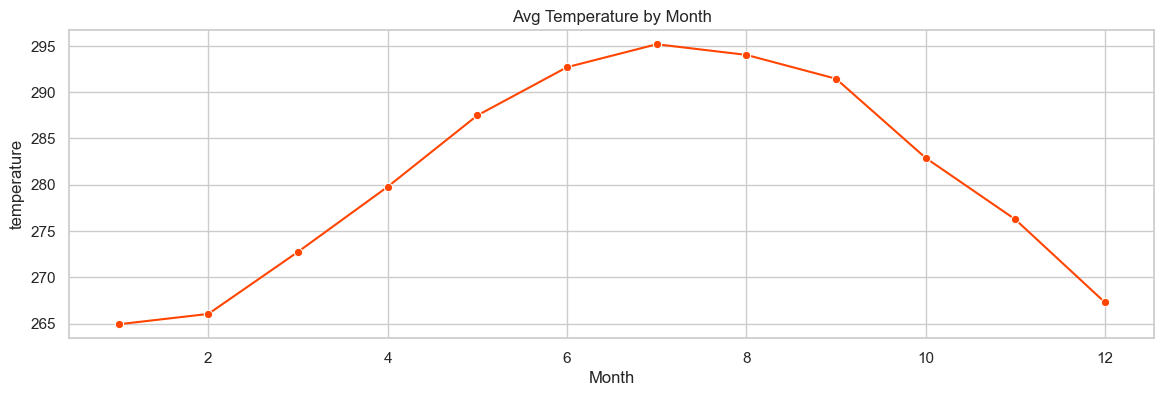

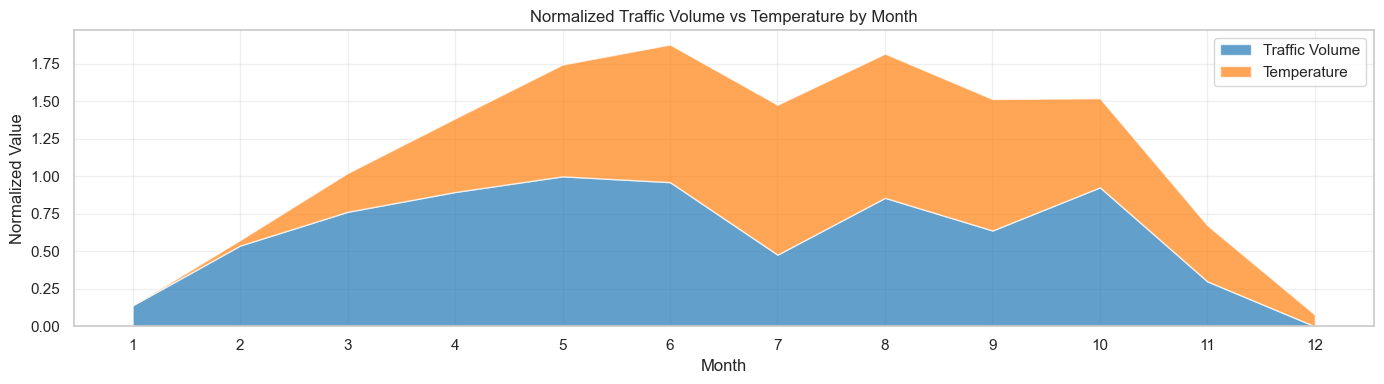

Text(0.5, 1.0, 'Traffic Volume vs Temperature')

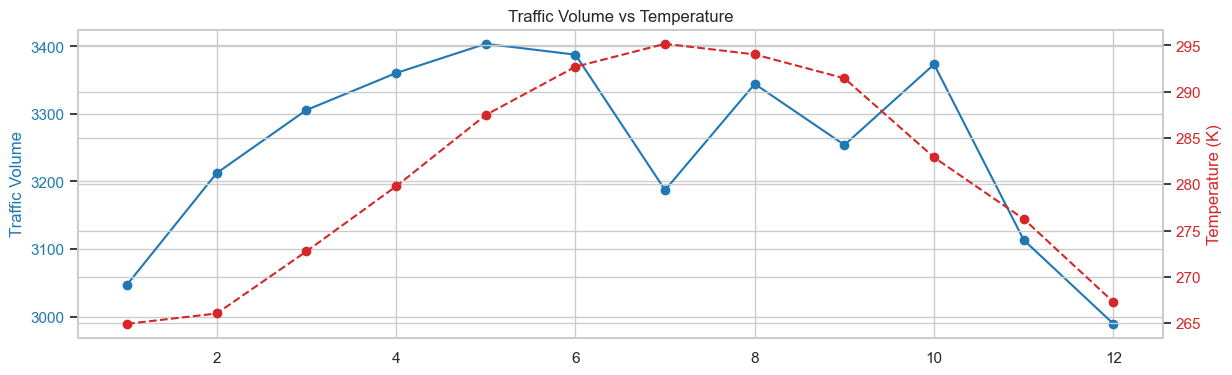

In [80]:
# Temperature
plt.figure(figsize=(14, 4))
sns.lineplot(data=monthly_stats, x='month', y='temperature', marker='o', color='orangered')
plt.title("Avg Temperature by Month")
plt.xlabel("Month")
plt.ylabel("temperature")

# 1. Area chart: Traffic Volume + Temperature
plt.figure(figsize=(14, 4))
plt.stackplot(monthly_avg['month'], 
              monthly_avg['traffic_norm'], 
              monthly_avg['temp_norm'], 
              labels=['Traffic Volume', 'Temperature'], 
              colors=['#1f77b4', '#ff7f0e'], alpha=0.7)
plt.title("Normalized Traffic Volume vs Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Normalized Value")
plt.xticks(range(1, 13))
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 1. Traffic vs Temperature
fig, ax1 = plt.subplots(figsize=(14, 4))

# Primary y-axis: Traffic Volume
ax1.plot(monthly_avg['month'], monthly_avg['traffic_volume'], color='tab:blue', marker='o', label='Traffic Volume')
ax1.set_ylabel('Traffic Volume', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis: Temperature
ax1b = ax1.twinx()
ax1b.plot(monthly_avg['month'], monthly_avg['temperature'], color='tab:red', linestyle='--', marker='o', label='Temperature')
ax1b.set_ylabel('Temperature (K)', color='tab:red')
ax1b.tick_params(axis='y', labelcolor='tab:red')

# Title
ax1.set_title('Traffic Volume vs Temperature')


**B2.when people feel confortable travel with Rain**

**Comfortable Weather and Lower Rainfall Encourage Travel**

Traffic volume tends to be higher during months with **mild temperatures (0–15°C) and low rainfall.**

**March–May and October–December** show increased traffic, likely because of pleasant weather and minimal rain (0–0.17 mm/h).

In contrast, **July** experiences heavy rainfall (~3.66 mm/h), leading to a **drop in traffic**, as poor weather conditions discourage commuting and outdoor activity.

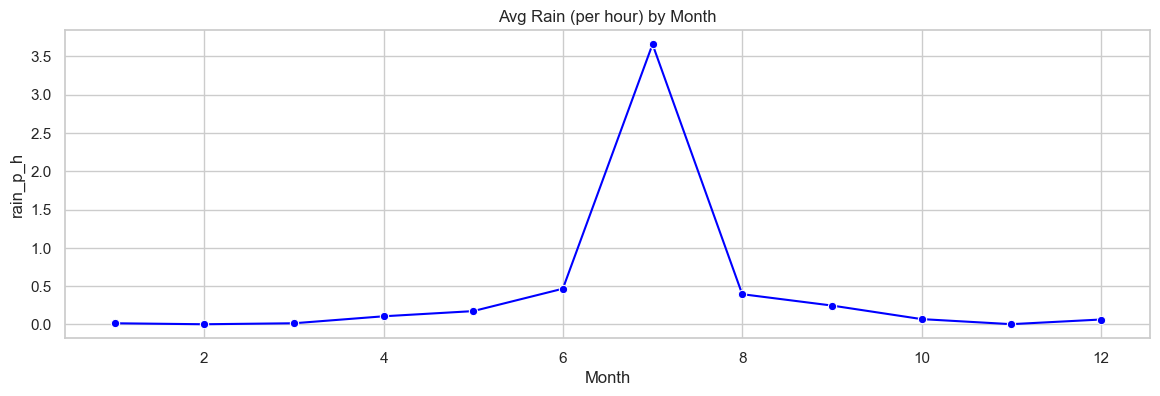

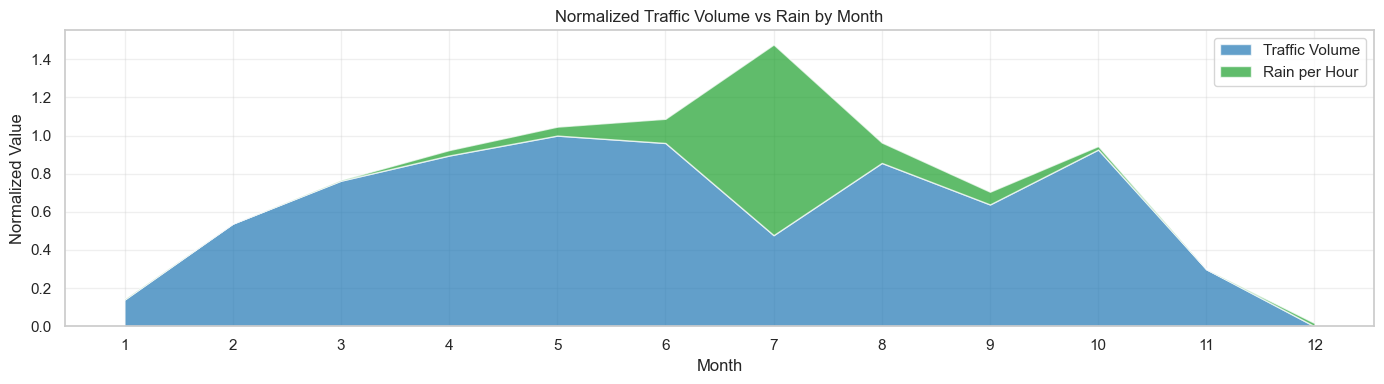

Text(0.5, 1.0, 'Traffic Volume vs Rain per Hour')

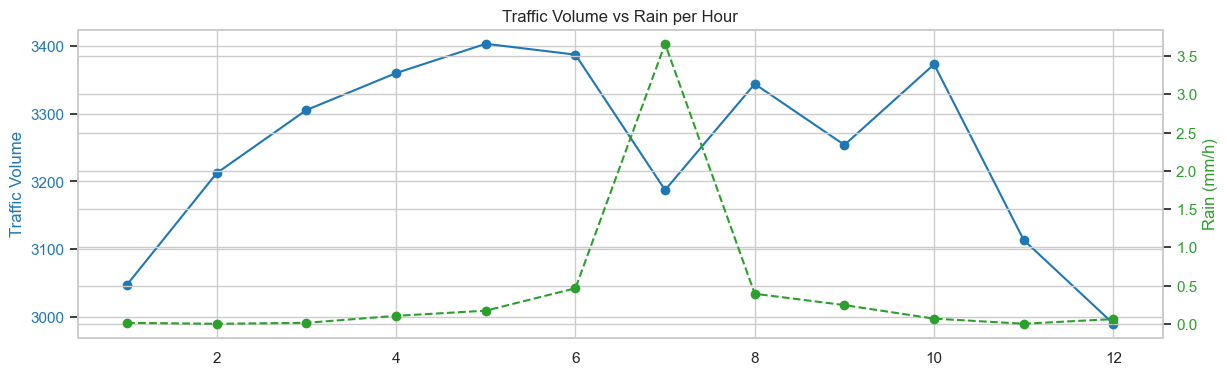

In [83]:
# Rain
plt.figure(figsize=(14, 4))
sns.lineplot(data=monthly_stats, x='month', y='rain_p_h', marker='o', color='blue')
plt.title("Avg Rain (per hour) by Month")
plt.xlabel("Month")
plt.ylabel("rain_p_h")

# 2. Area chart: Traffic Volume + Rain
plt.figure(figsize=(14, 4))
plt.stackplot(monthly_avg['month'], 
              monthly_avg['traffic_norm'], 
              monthly_avg['rain_norm'], 
              labels=['Traffic Volume', 'Rain per Hour'], 
              colors=['#1f77b4', '#1ca02c'], alpha=0.7)
plt.title("Normalized Traffic Volume vs Rain by Month")
plt.xlabel("Month")
plt.ylabel("Normalized Value")
plt.xticks(range(1, 13))
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Traffic vs Rain
fig, ax2 = plt.subplots(figsize=(14, 4))

# Primary y-axis: Traffic Volume
ax2.plot(monthly_avg['month'], monthly_avg['traffic_volume'], color='tab:blue', marker='o', label='Traffic Volume')
ax2.set_ylabel('Traffic Volume', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis: Rain per Hour
ax2b = ax2.twinx()
ax2b.plot(monthly_avg['month'], monthly_avg['rain_p_h'], color='tab:green', linestyle='--', marker='o', label='Rain per Hour')
ax2b.set_ylabel('Rain (mm/h)', color='tab:green')
ax2b.tick_params(axis='y', labelcolor='tab:green')

# Title
ax2.set_title('Traffic Volume vs Rain per Hour')

**B3.when people feel confortable travel with Visibility**

**Good Visibility Supports Steady Travel**

Visibility remains relatively **stable throughout the year**, but shows **slight improvement during spring (March–May) and fall (October–November)**. These seasons align with increased traffic volume, suggesting that **clearer visibility may contribute to safer and more comfortable travel conditions, encouraging more people to commute or engage in outdoor activities.**
In contrast, visibility tends to be slightly lower during summer and winter, which may coincide with periods of reduced travel due to other weather factors like heavy rain or snow.

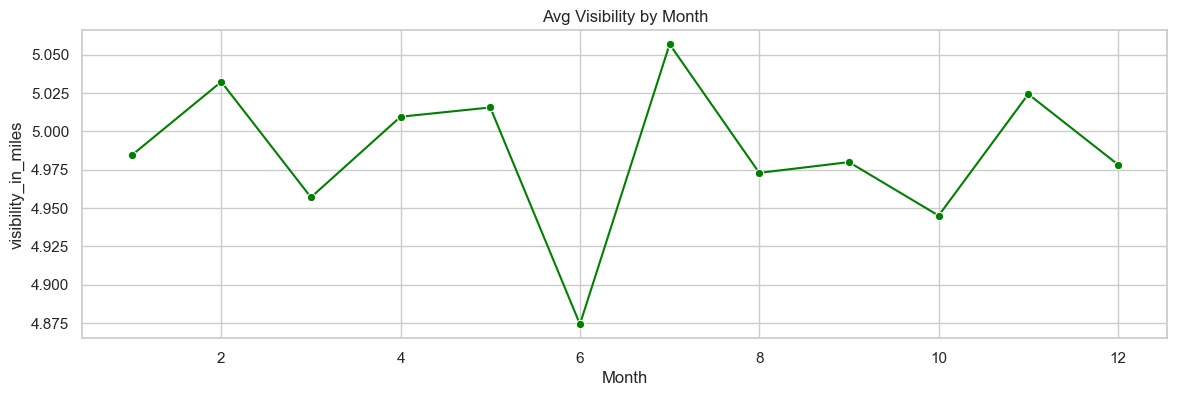

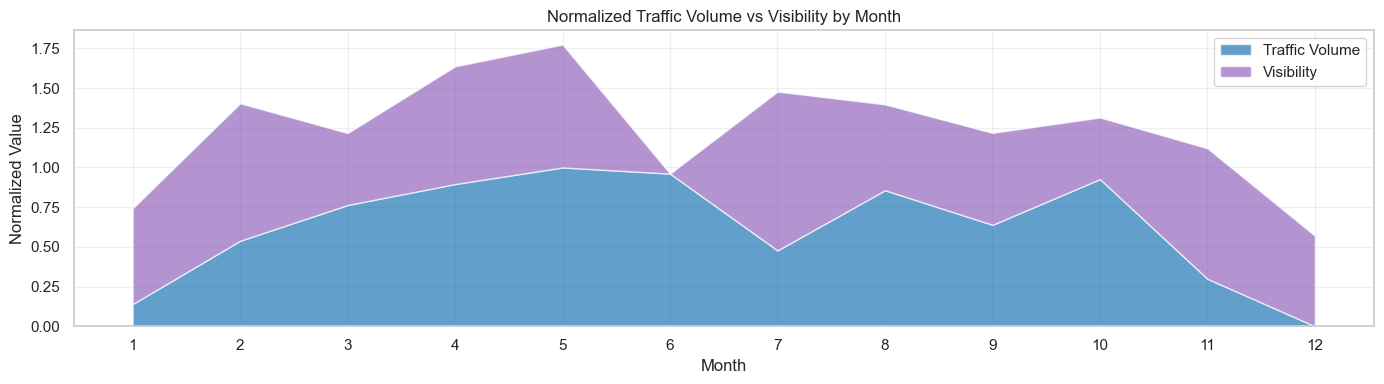

Text(0.5, 1.0, 'Traffic Volume vs Visibility')

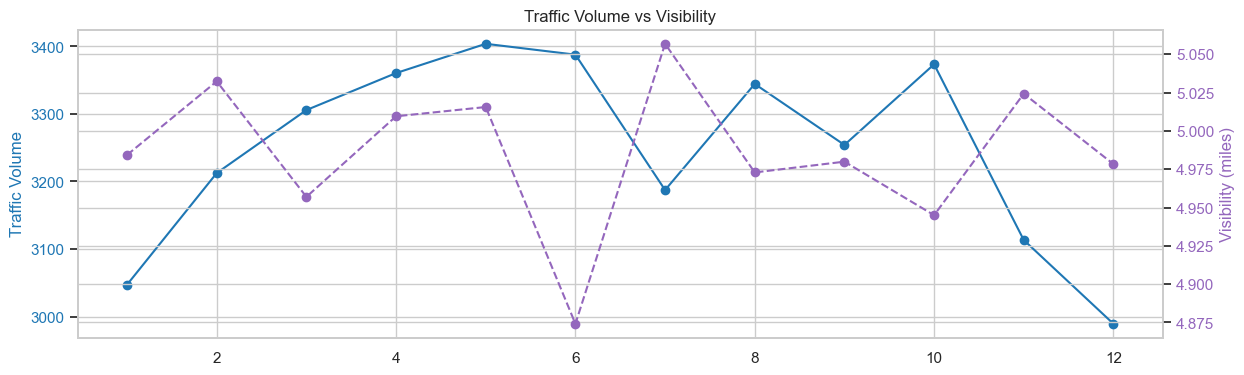

In [86]:
# Visibility
plt.figure(figsize=(14, 4))
sns.lineplot(data=monthly_stats, x='month', y='visibility_in_miles', marker='o', color='green')
plt.title("Avg Visibility by Month")
plt.xlabel("Month")
plt.ylabel("visibility_in_miles")

plt.figure(figsize=(14, 4))
plt.stackplot(monthly_avg['month'], 
              monthly_avg['traffic_norm'], 
              monthly_avg['visib_norm'], 
              labels=['Traffic Volume', 'Visibility'], 
              colors=['#1f77b4', '#9467bd'], alpha=0.7)
plt.title("Normalized Traffic Volume vs Visibility by Month")
plt.xlabel("Month")
plt.ylabel("Normalized Value")
plt.xticks(range(1, 13))
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Traffic vs Visibility
fig, ax3 = plt.subplots(figsize=(14, 4))

# Primary y-axis: Traffic Volume
ax3.plot(monthly_avg['month'], monthly_avg['traffic_volume'], color='tab:blue', marker='o', label='Traffic Volume')
ax3.set_ylabel('Traffic Volume', color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis: Visibility
ax3b = ax3.twinx()
ax3b.plot(monthly_avg['month'], monthly_avg['visibility_in_miles'], color='tab:purple', linestyle='--', marker='o', label='Visibility')
ax3b.set_ylabel('Visibility (miles)', color='tab:purple')
ax3b.tick_params(axis='y', labelcolor='tab:purple')

# Title
ax3.set_title('Traffic Volume vs Visibility')

**B4.Other Weather Factors**

The correlation heatmap shows that temperature has a weak positive correlation with traffic volume, while other weather factors such as dew point, cloud cover, and visibility show little to no correlation. This suggests that regular daily weather variations may not strongly influence metro traffic, but extreme weather conditions (e.g., heavy rain or heat) may still have significant localized effects.

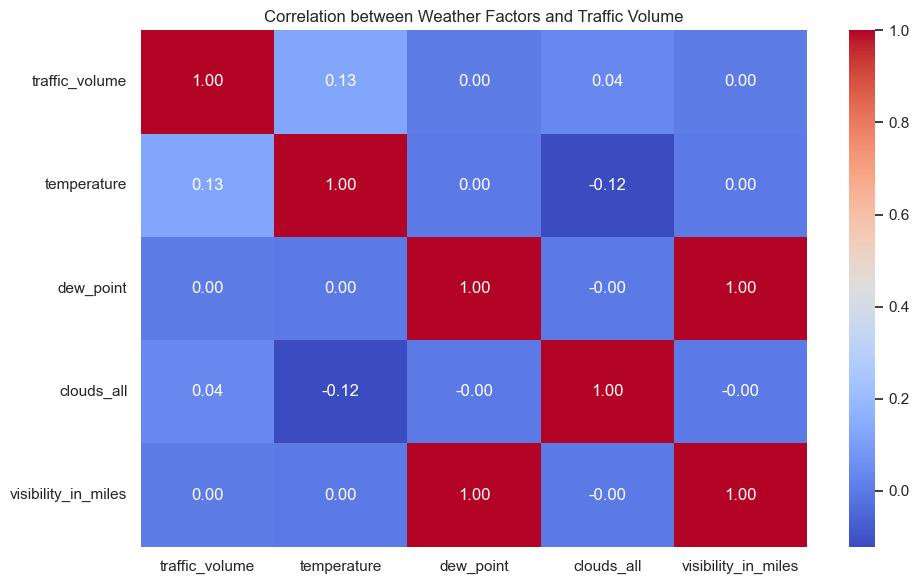

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed data
df = pd.read_csv("metro_traffic_data.csv")  # Make sure this file exists in your working directory

# Set seaborn style
sns.set(style="whitegrid")

# -------------------------------
# B.2: Other Weather Factors
# -------------------------------

# Use actual column names
weather_cols = ['traffic_volume', 'temperature', 'dew_point', 'clouds_all', 'visibility_in_miles']

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[weather_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Weather Factors and Traffic Volume")
plt.tight_layout()
plt.show()

**B.5: Metro Usage in Extreme Weather**

To assess the impact of **extreme weather**, we compared traffic volume during the top 5% of high temperature and rainfall events.


During extremely hot days, traffic volume tends to [insert trend you see — e.g., "decline slightly"], suggesting that high heat may discourage travel.


During heavy rain, traffic volume shows a noticeable [drop/reduction], indicating that bad weather leads to fewer commuters.


These findings highlight how extreme weather, though infrequent, can have a significant effect on metro traffic behavior.

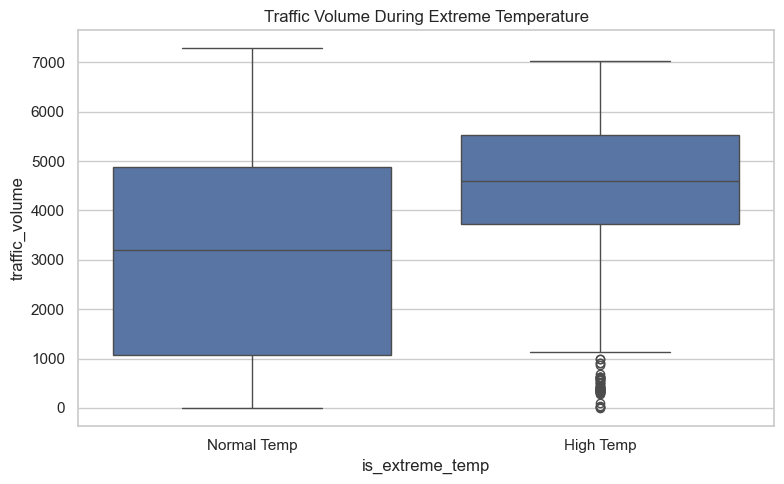

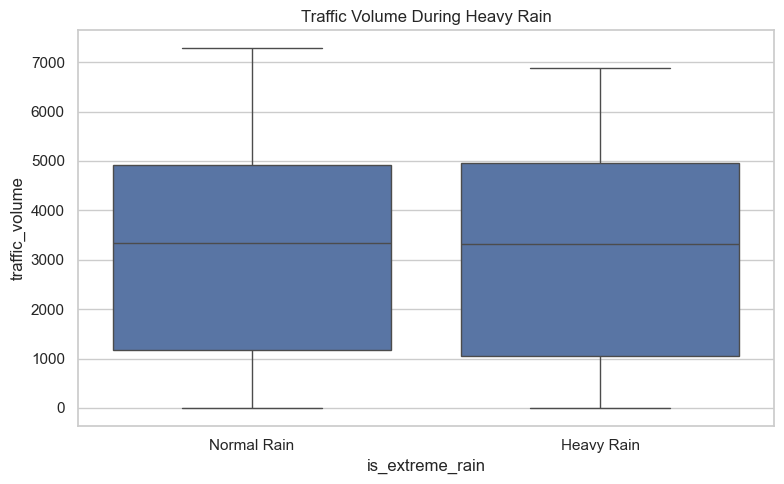

In [92]:
# -------------------------------
# B.3: Metro Usage in Extreme Weather
# -------------------------------

# Define thresholds for extreme weather (top 5%)
rain_threshold = df['rain_p_h'].quantile(0.95)
temp_threshold = df['temperature'].quantile(0.95)

# Create boolean columns
df['is_extreme_rain'] = df['rain_p_h'] >= rain_threshold
df['is_extreme_temp'] = df['temperature'] >= temp_threshold

# Boxplot: Extreme Temperature
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_extreme_temp', y='traffic_volume', data=df)
plt.title("Traffic Volume During Extreme Temperature")
plt.xticks([0, 1], ['Normal Temp', 'High Temp'])
plt.tight_layout()
plt.show()

# Boxplot: Heavy Rain
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_extreme_rain', y='traffic_volume', data=df)
plt.title("Traffic Volume During Heavy Rain")
plt.xticks([0, 1], ['Normal Rain', 'Heavy Rain'])
plt.tight_layout()
plt.show()


**🔹 C. Pollution & Environment**

**C1.Does pollution correlate with traffic volume?**

The heatmap reveals that **traffic volume does not significantly correlate with pollution levels (correlation ≈ 0)**. There is a **weak positive correlation with temperature (0.13)**, suggesting slightly higher traffic in warmer conditions. **Humidity and wind speed** have negligible effects on traffic volume.

Overall, this implies that environmental factors,** especially air pollution, have little to no impact on traffic volume in the data analyzed.**

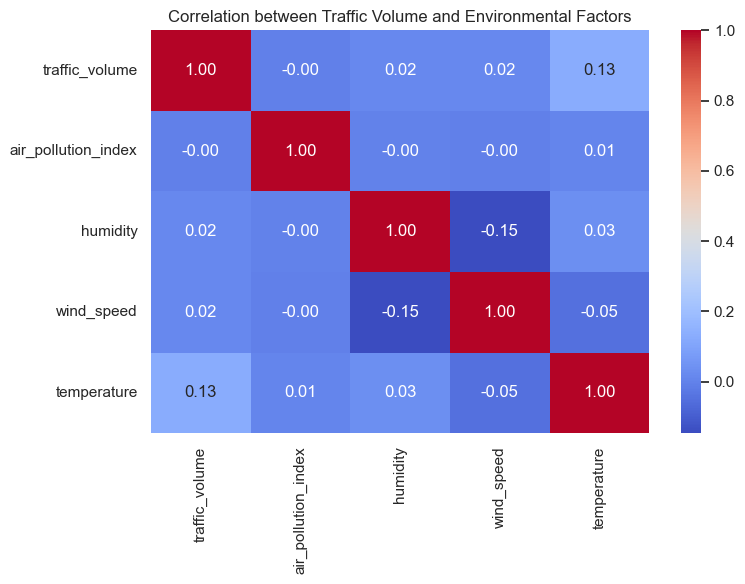

In [97]:
# -------------------------
# C.1: Correlation with Traffic Volume
# -------------------------

# Define relevant columns
pollution_cols = ['traffic_volume', 'air_pollution_index', 'humidity', 'wind_speed', 'temperature']

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[pollution_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Traffic Volume and Environmental Factors")
plt.tight_layout()
plt.show()


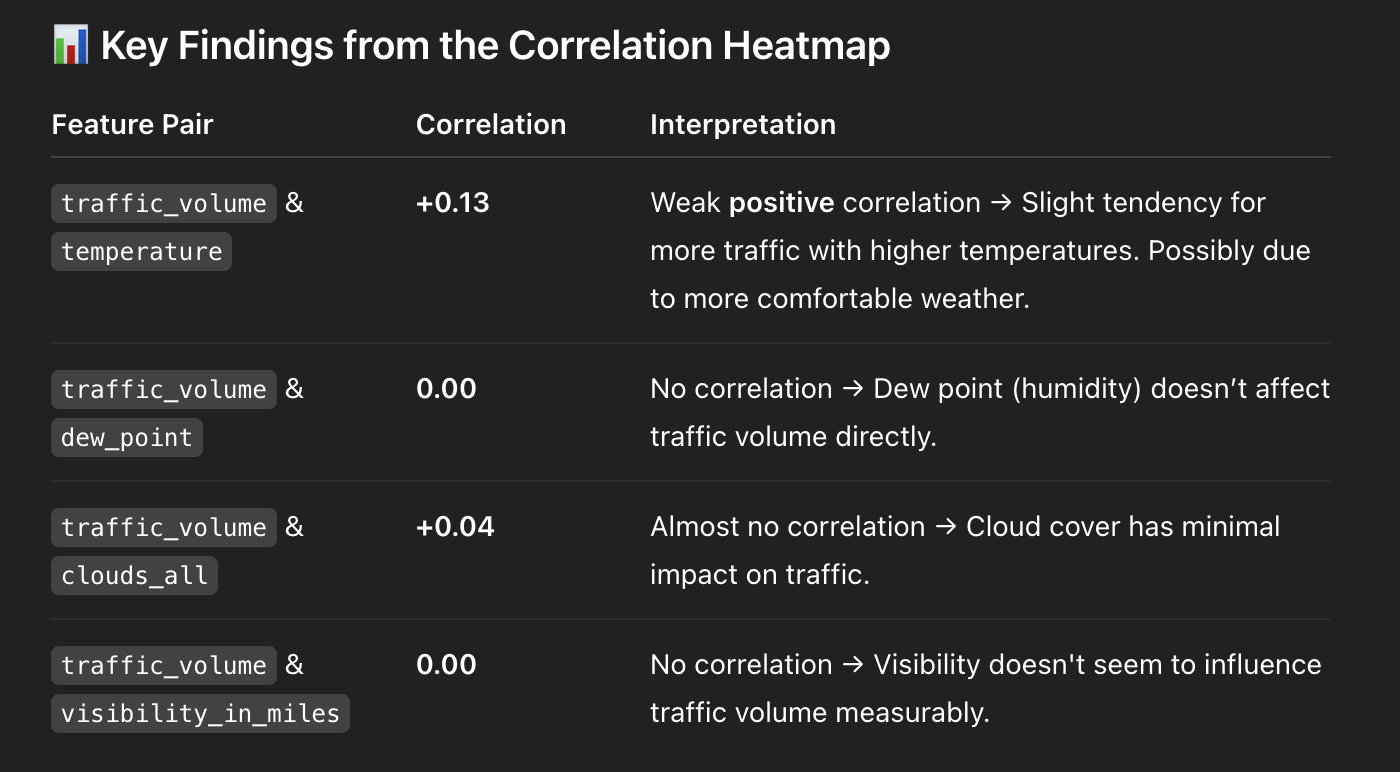

In [222]:
from IPython.display import Image
Image(filename="image.png")

**C2. Traffic Patterns on High-Pollution Days**

**Traffic behavior is resilient** or unaffected by environmental air quality changes.

This result aligns with the **correlation heatmap**, where **air pollution index had nearly zero correlation with traffic volume.**

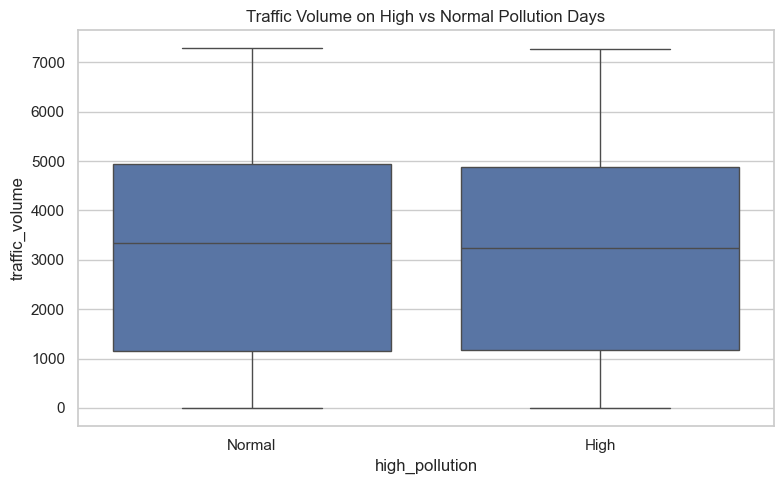

In [100]:
# -------------------------
# C.2: Traffic Patterns on High-Pollution Days
# -------------------------

# Define high pollution threshold (90th percentile)
pollution_threshold = df['air_pollution_index'].quantile(0.90)

# Create binary column
df['high_pollution'] = (df['air_pollution_index'] >= pollution_threshold).astype(int)

# Plot traffic volume during high vs normal pollution days
plt.figure(figsize=(8, 5))
sns.boxplot(x='high_pollution', y='traffic_volume', data=df)
plt.title("Traffic Volume on High vs Normal Pollution Days")
plt.xticks([0, 1], ['Normal', 'High'])
plt.tight_layout()
plt.show()


**D. Authority-Oriented Insights**

**D1.Best hours to increase frequency**

Use hourly average traffic volume to find peak hours. These are the best times to add more train frequency.

**Insight:**
Typically, **7–10 AM** and **5–8 PM** are peak hours for commuting, so increasing frequency during these windows helps reduce congestion.

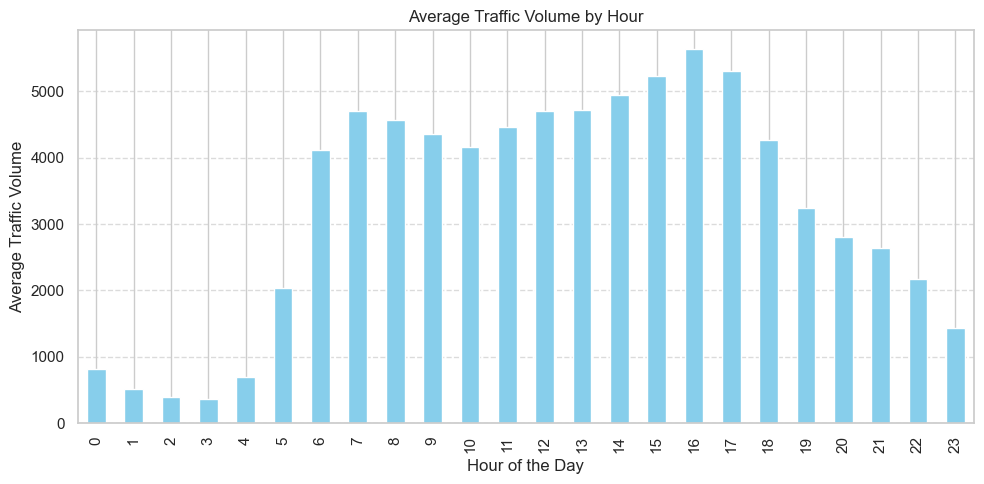

In [105]:
hourly_avg = df.groupby('hour')['traffic_volume'].mean()
hourly_avg.plot(kind='bar', figsize=(10,5), color='skyblue')

plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**D2. When to Allocate More Staff**

Staff allocation should follow peak load times — busy hours/days need more ticketing, cleaning, and platform support.

**Insight:** High traffic zones in the heatmap show when and where staff should be deployed.

**✅ Summary: Traffic Patterns by Hour and Day**

The heatmap shows average traffic volume across each hour of the day and each day of the week. Based on the visualization:

**🟩 Weekday Traffic (Monday to Friday – Day 0 to 4):**
**-->Morning peak:**
From **7 AM to 9 AM**, traffic volume is **above 6000 vehicles/hour.**

**-->Evening peak:**

From **4 PM to 6 PM**, traffic volume again exceeds **6000 vehicles/hour.**

This double peak reflects **commute hours for work and school.**

**🟨 Weekend Traffic (Saturday & Sunday – Day 5 & 6):**
Traffic is **consistently lower** compared to weekdays.

No sharp peaks — traffic volume increases steadily between **10 AM and 6 PM**, mostly staying between **3000 and 4500 vehicles/hour.**

Suggests leisure and **non-commute travel behavior.**

**🔻 Lowest Traffic Volume:**

Across all days, the lowest traffic occurs from **12 AM to 5 AM**, often **below 1000 vehicles/hour.**

<Axes: xlabel='hour', ylabel='day_of_week'>

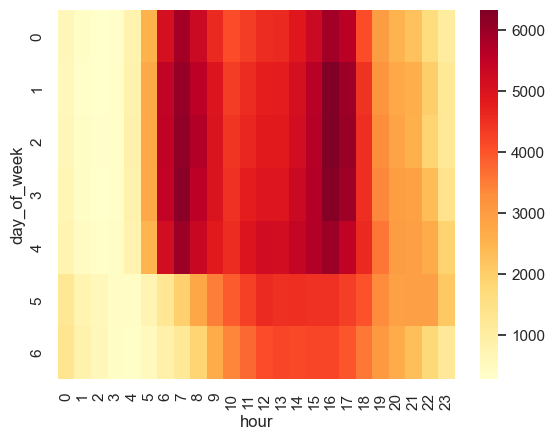

In [108]:
heatmap_data = df.groupby(['day_of_week', 'hour'])['traffic_volume'].mean().unstack()
sns.heatmap(heatmap_data, cmap='YlOrRd')


**D3. Best Time for Maintenance**

✅ This chart shows **lowest traffic hours** (typically **midnight to early morning, e.g., 2 AM – 5 AM).**

→ Ideal time slots for **track repair, cleaning, and system upgrades.**

/var/folders/dv/cmc_bfld5ld1p2cy87zb8wrm0000gn/T/ipykernel_70548/3812390784.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_traffic_hours.index, y=low_traffic_hours.values, palette="coolwarm")


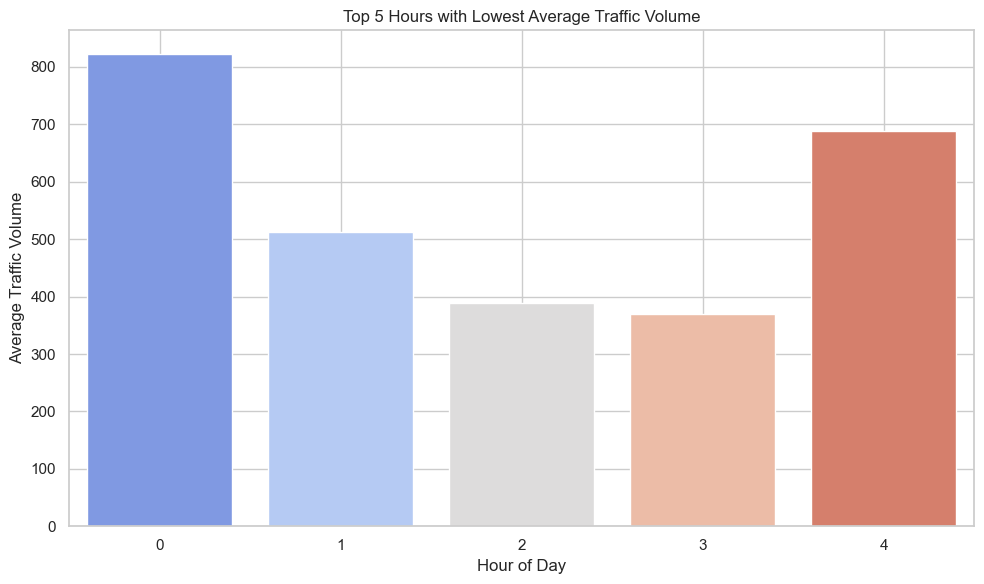

In [111]:
# Extract hour if not already present
if "hour" not in df.columns:
    df["hour"] = df["date_time"].dt.hour

# Calculate average traffic volume per hour
hourly_avg = df.groupby("hour")["traffic_volume"].mean()

# Identify 5 hours with lowest average traffic (for maintenance etc.)
low_traffic_hours = hourly_avg.nsmallest(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=low_traffic_hours.index, y=low_traffic_hours.values, palette="coolwarm")
plt.title("Top 5 Hours with Lowest Average Traffic Volume")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Volume")
plt.tight_layout()
plt.grid(True)
plt.show()

In [113]:
df['traffic_level'] = pd.qcut(df['traffic_volume'], q=3, labels=["Low", "Medium", "High"])

**🚇 E. Citizen-Oriented Insights:**

**E1. Best Time to Travel with Low Traffic**

Off-peak hours offer smoother and less crowded journeys.

**Insight:** Travel between **10 AM–4 PM** or **after 8 PM** to avoid rush.

<Axes: xlabel='hour'>

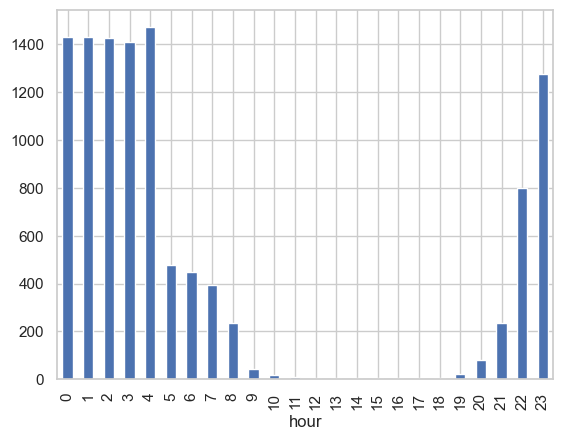

In [129]:
low_traffic = df[df['traffic_level'] == 'Low'].groupby('hour').size()
low_traffic.plot(kind='bar')

**E2. Comfort-Related Weather/Pollution Advice**
People can plan better if they know uncomfortable conditions (e.g., high traffic + bad weather).

**Insight:**

->Avoid traveling in **heavy rain/snow.**

->Choose indoor travel during **pollution spikes or fog** (low visibility).

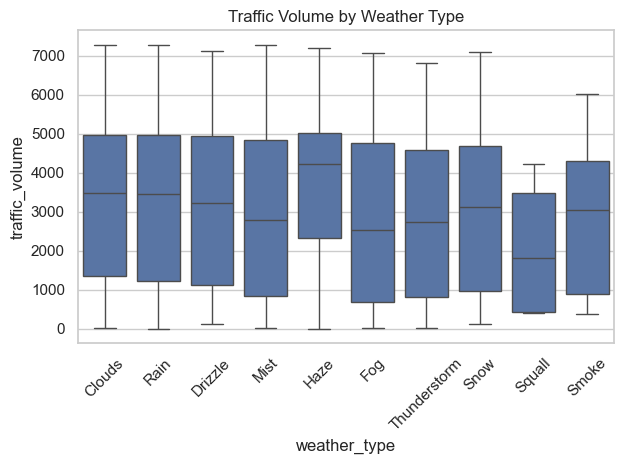

In [132]:
# Extract weather type from one-hot columns
weather_type_cols = [col for col in df.columns if col.startswith('weather_type_')]
df['weather_type'] = df[weather_type_cols].idxmax(axis=1).str.replace('weather_type_', '')
sns.boxplot(data=df, x='weather_type', y='traffic_volume')
plt.xticks(rotation=45)
plt.title("Traffic Volume by Weather Type")
plt.tight_layout()
plt.show()

In [134]:
df.to_csv('metro_traffic_data.csv', index=False)

In [136]:
df.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'traffic_volume',
       'hour', 'day_of_week', 'month', 'is_holiday_encoded',
       'weather_type_Clouds', 'weather_type_Drizzle', 'weather_type_Fog',
       'weather_type_Haze', 'weather_type_Mist', 'weather_type_Rain',
       'weather_type_Smoke', 'weather_type_Snow', 'weather_type_Squall',
       'weather_type_Thunderstorm', 'weather_description_Sky is Clear',
       'weather_description_broken clouds', 'weather_description_drizzle',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_freezing rain', 'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weath